![GCAT | Genomes for Life](images/logo-GCAT.png)

# Filter blood pressure

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pylab import *
%matplotlib inline 

## Helper functions

### Joint plots

In [2]:
from scipy.stats import kendalltau
import seaborn as sns

def jointplot(a, b, ds):    
    sns.set(style="ticks")
    sns.jointplot(ds[a], ds[b], color="#4CB391")

def male(ds):
    return ds[ds['Admin.Participant.gender'] == 'MALE']
    
def female(ds):
    return ds[ds['Admin.Participant.gender'] == 'FEMALE']

## Load tables

- Participants
- TensionArterial

In [3]:
tensioarterial = pd.read_csv("/home/labs/dnalab/share/lims/R/gcat-cohort/output/export/TensionArterial/data.csv")
participants = pd.read_csv("/home/labs/dnalab/share/lims/R/gcat-cohort/output/export/Participants/data.csv")

all = participants
all = pd.merge(all, tensioarterial, on=['entity_id'])

## Select variables of interest

In [4]:
columns = [
    'entity_id',
    '1_TAS',
    '2_TAS',
    '3_TAS',
    'CALC_AVG_SYSTOLIC_BP',
    '1_TAD',
    '2_TAD',
    '3_TAD',
    'CALC_AVG_DIASTOLIC_BP',
    '1_PULS',
    '2_PULS',
    '3_PULS',
    'CALC_AVG_PULSE_RATE',
    'Admin.Participant.gender'
]

all = all.ix[:,columns]
all = all.dropna()

## Explore systolic and diastolic pressure

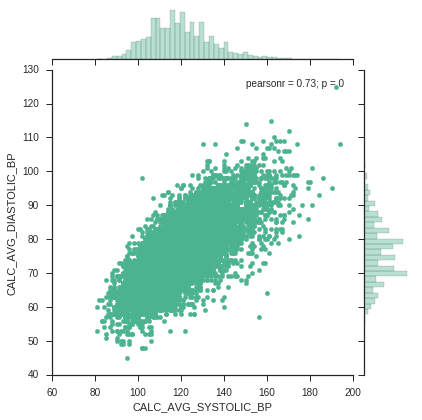

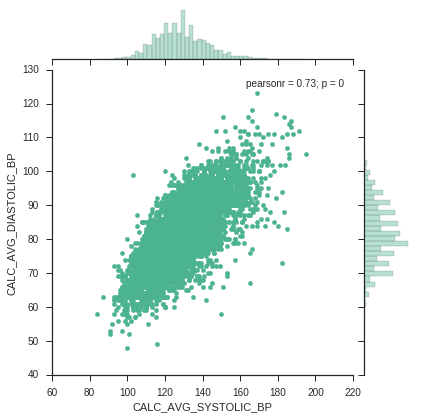

In [5]:
ds = all.copy()

jointplot('CALC_AVG_SYSTOLIC_BP', 'CALC_AVG_DIASTOLIC_BP', female(ds))
jointplot('CALC_AVG_SYSTOLIC_BP', 'CALC_AVG_DIASTOLIC_BP', male(ds))

## Explore pulse

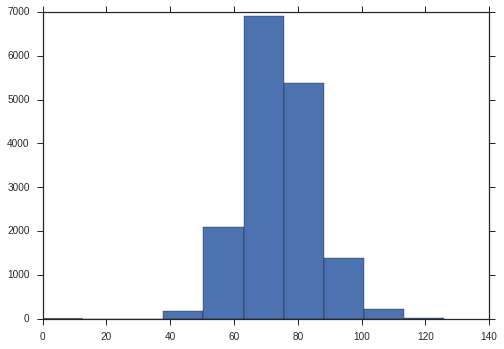

In [6]:
plt.hist(ds['CALC_AVG_PULSE_RATE'])
plt.show()

## Write inferred measures

In [7]:
columns = ['entity_id', 'CALC_AVG_SYSTOLIC_BP', 'CALC_AVG_DIASTOLIC_BP', 'CALC_AVG_PULSE_RATE']
ds[columns].to_csv('../output/check/bp/data.csv', index=False)